In [1]:
# Upload data
from google.colab import files
uploaded = files.upload()


Saving poems-100.csv to poems-100.csv


In [2]:
# Imports
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dropout, Dense , Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
import pandas as pd

In [3]:
# Reading input
df = pd.read_csv('/content/poems-100.csv')

In [4]:
df.head()

,text
0,"O my Luve's like a red, red rose\nThat’s newly..."
1,"The rose is red,\nThe violet's blue,\nSugar is..."
2,How do I love thee? Let me count the ways.\nI ...
3,"Had I the heavens' embroidered cloths,\nEnwrou..."
4,"I.\n Enough! we're tired, my heart and I.\n..."


In [5]:
df.tail()

,text
95,The city had withdrawn into itself\nAnd left a...
96,O gift of God! O perfect day:\n Whereon...
97,"The world is too much with us; late and soon,\..."
98,To him who in the love of Nature holds\nCo...
99,It was an April morning: fresh and clear \nThe...


In [6]:

# Text normalization
text = "".join(df['text'].dropna())
text = text.lower()
text = text.replace("\n", "")

In [7]:
print(text[:1000])

o my luve's like a red, red rosethat’s newly sprung in june;o my luve's like the melodiethat’s sweetly play'd in tune.as fair art thou, my bonnie lass,so deep in luve am i:and i will luve thee still, my dear,till a’ the seas gang dry:till a’ the seas gang dry, my dear,and the rocks melt wi’ the sun:i will luve thee still, my dear,while the sands o’ life shall run.and fare thee well, my only luveand fare thee well, a while!and i will come again, my luve,tho’ it were ten thousand mile.the rose is red,the violet's blue,sugar is sweet,and so are you.how do i love thee? let me count the ways.i love thee to the depth and breadth and heightmy soul can reach, when feeling out of sightfor the ends of being and ideal grace.i love thee to the level of every day'smost quiet need, by sun and candle-light.i love thee freely, as men strive for right.i love thee purely, as they turn from praise.i love thee with the passion put to usein my old griefs, and with my childhood's faith.i love thee with a lo

In [8]:
# Printing the length of the text
print(len(text))

135806


In [9]:
# Tokenizing the data
n_words = 10
input = [] #input words to be in the sequence
next = []  #The next word (output)


tokenization = RegexpTokenizer(r"\w+")
tokenized_text = tokenization.tokenize(text)
print(tokenized_text[:1000])
unique_words = np.unique(tokenized_text)

#indexing the unique words
index = {c:i for i, c in enumerate(unique_words)}
print(len(unique_words))

#Appending the input and next words
for i in range(len(tokenized_text) - n_words):
    input.append(tokenized_text[i:i+n_words])
    next.append(tokenized_text[i+n_words])

['o', 'my', 'luve', 's', 'like', 'a', 'red', 'red', 'rosethat', 's', 'newly', 'sprung', 'in', 'june', 'o', 'my', 'luve', 's', 'like', 'the', 'melodiethat', 's', 'sweetly', 'play', 'd', 'in', 'tune', 'as', 'fair', 'art', 'thou', 'my', 'bonnie', 'lass', 'so', 'deep', 'in', 'luve', 'am', 'i', 'and', 'i', 'will', 'luve', 'thee', 'still', 'my', 'dear', 'till', 'a', 'the', 'seas', 'gang', 'dry', 'till', 'a', 'the', 'seas', 'gang', 'dry', 'my', 'dear', 'and', 'the', 'rocks', 'melt', 'wi', 'the', 'sun', 'i', 'will', 'luve', 'thee', 'still', 'my', 'dear', 'while', 'the', 'sands', 'o', 'life', 'shall', 'run', 'and', 'fare', 'thee', 'well', 'my', 'only', 'luveand', 'fare', 'thee', 'well', 'a', 'while', 'and', 'i', 'will', 'come', 'again', 'my', 'luve', 'tho', 'it', 'were', 'ten', 'thousand', 'mile', 'the', 'rose', 'is', 'red', 'the', 'violet', 's', 'blue', 'sugar', 'is', 'sweet', 'and', 'so', 'are', 'you', 'how', 'do', 'i', 'love', 'thee', 'let', 'me', 'count', 'the', 'ways', 'i', 'love', 'thee',

In [10]:
# Setting up X and Y vectors
X = np.zeros((len(input), n_words, len(unique_words)), dtype="bool")
y = np.zeros((len(next), len(unique_words)), dtype="bool" )
for i, words in enumerate (input):
    for j, word in enumerate (words):
        X[i, j, index[word]] = 1
        y[i, index [next[i]]] =1

In [11]:
# Creating the model
model = Sequential()

# Input layer
model.add(Input(shape=(X.shape[1], X.shape[2])))

# First LSTM layer with return_sequences=True
model.add(LSTM(256, return_sequences=True))  # Set return_sequences=True

# Second LSTM layer
model.add(LSTM(128))

# Add Dropout and Dense layers
model.add(Dense(len(unique_words), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [12]:
# Training the data
history = model.fit(X, y, epochs=100, batch_size=64)

Epoch 1/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.0701 - loss: 7.3624
Epoch 2/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0729 - loss: 6.6451
Epoch 3/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.0697 - loss: 6.6409
Epoch 4/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.0724 - loss: 6.5313
Epoch 5/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.0758 - loss: 6.4861
Epoch 6/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.0831 - loss: 6.3398
Epoch 7/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0918 - loss: 6.1455
Epoch 8/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0994 - loss: 5.9591
Epoch 9/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.1065 - loss: 5.7941
Epoch 10/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.1140 - loss: 5.6173
Epoch 11/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.1274 - loss: 5.4233
Epoch 12/100
394/394

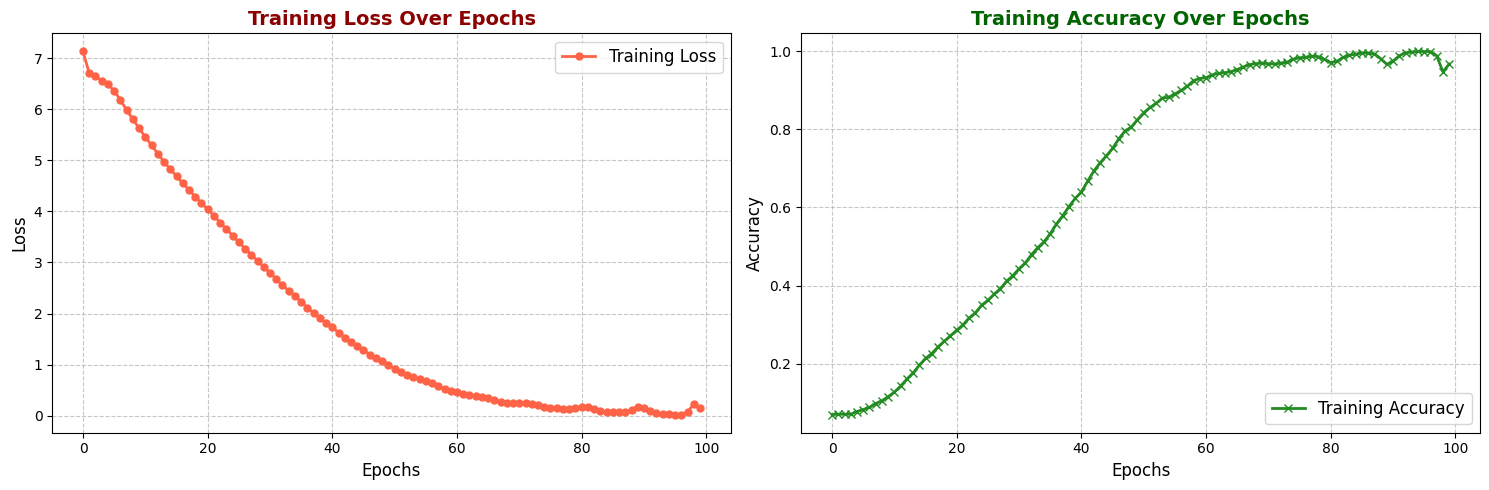

In [13]:
# Visualizing results
import matplotlib.pyplot as plt


training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

# Set up a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# --- Plot 1: Training Loss ---
ax[0].plot(training_loss, label='Training Loss', color='tomato', linewidth=2, linestyle='-', marker='o', markersize=5)
ax[0].set_title('Training Loss Over Epochs', fontsize=14, fontweight='bold', color='darkred')
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend(loc='upper right', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# --- Plot 2: Training Accuracy ---
ax[1].plot(training_accuracy, label='Training Accuracy', color='forestgreen', linewidth=2, linestyle='-', marker='x', markersize=6)
ax[1].set_title('Training Accuracy Over Epochs', fontsize=14, fontweight='bold', color='darkgreen')
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Accuracy', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend(loc='lower right', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=10)


plt.tight_layout()


plt.show()

In [14]:
# Output Generatoin
import numpy as np

def preprocess_input_text(input_text, seq_length):
    input_text = input_text.lower()
    X = np.zeros((1, seq_length, len(unique_words)))
    for i, word in enumerate(input_text.split()[:seq_length]):
        word_index = index.get(word, len(unique_words) - 1)  # Assigns last index if word is unknown
        if word_index < len(unique_words):
            X[0, i, word_index] = 1
    return X

def predict_next_words(input_text, n_best):
    X = preprocess_input_text(input_text, n_words)
    predictions = model.predict(X)[0]
    top_indices = np.argpartition(predictions, -n_best)[-n_best:]
    top_indices = top_indices[np.argsort(predictions[top_indices])[::-1]]
    return [unique_words[idx] for idx in top_indices]

prediction = predict_next_words("how do i love thee let me count the ways", 10)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
['i', 'to', 'it', 'and', 'the', 'not', 'they', 'is', 'in', 'you']


In [15]:
# Text Generation
import random

def generate_text(input_text, text_length, creativity=3):
    words = input_text.lower().split()
    for _ in range(text_length):
        sequence = " ".join(tokenization.tokenize(" ".join(words))[-n_words:])
        try:
            next_word = unique_words[random.choice(predict_next_words(sequence, creativity))]
        except IndexError:
            next_word = random.choice(unique_words)
        words.append(next_word)
    return " ".join(words)

generate_text("how do i love thee let me count the ways", 100, 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

'how do i love thee let me count the ways tight lilac remember layers kettle lacy impaired talkative rows plead group soul enclosing feast garret learns harpoon salt song pumps provokes jolly goldbug butcher sunday old eyeor reality verse gray gazing accepting speech drew stonecrop ago giant fat cries hat wired lonesome guided laps lusts sick glum mortal fugitives austere miserable sexton organ persons tinged becomeof wildly grenades badger suppose thing welcome feast wellthe gentlemen nodding massacred creeds shuddering cove master jetting descended peruse manikins nourishing grey horn delight awake breastworks small would positive quickly tread whistle ribbed wounds prow october identity hill lightens thinner limitless outlaw heartful view nourishing'

In [16]:
# Saving the weights
model.save_weights('/content/rnn_poem.weights.h5')